# Final Project

## 把 table groupby
* day
* hour

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import json
import pandas as pd
from pandas.io.json import json_normalize

In [60]:
# list all processed table 
processedList = !(ls logfile/table/*.csv | head -n 2400)

for i, c in enumerate(processedList):
    processedList[i] = "./logfile/table/" + c.split('/')[-1]
print('processed json:\n')
print(processedList.nlstr)
print('-'*20)

processed json:

./logfile/table/2018-12-08-0309.csv
./logfile/table/2018-12-08-0340.csv
./logfile/table/2018-12-08-0345.csv
./logfile/table/2018-12-08-0350.csv
./logfile/table/2018-12-08-0355.csv
./logfile/table/2018-12-08-0400.csv
./logfile/table/2018-12-08-0405.csv
./logfile/table/2018-12-08-0410.csv
./logfile/table/2018-12-08-0415.csv
./logfile/table/2018-12-08-0420.csv
./logfile/table/2018-12-08-0425.csv
./logfile/table/2018-12-08-0430.csv
./logfile/table/2018-12-08-0435.csv
./logfile/table/2018-12-08-0440.csv
./logfile/table/2018-12-08-0445.csv
./logfile/table/2018-12-08-0450.csv
./logfile/table/2018-12-08-0455.csv
./logfile/table/2018-12-08-0500.csv
./logfile/table/2018-12-08-0505.csv
./logfile/table/2018-12-08-0510.csv
./logfile/table/2018-12-08-0515.csv
./logfile/table/2018-12-08-0520.csv
./logfile/table/2018-12-08-0525.csv
./logfile/table/2018-12-08-0530.csv
./logfile/table/2018-12-08-0535.csv
./logfile/table/2018-12-08-0540.csv
./logfile/table/2018-12-08-0545.csv
./logfile/t

In [61]:
processedList = processedList[1200:]

In [63]:
processedList[0]

'./logfile/table/2018-12-12-0740.csv'

In [64]:
dropcol = ['app', 'device_id', 'fmt_opt', 'gps_alt', 'gps_fix', 'gps_num', 's_0', 's_1', 's_2', 's_3', 'tick', 'timestamp', 'ver_app', 'ver_format']
tables = pd.read_csv(processedList[0], index_col=[0]).drop(columns=dropcol)
for filename in processedList[1:]:
    
    table = pd.read_csv(filename, index_col=[0]).drop(columns=dropcol)
    tables = pd.concat([tables, table], ignore_index=True)
    
tables.head()

,SiteName,date,gps_lat,gps_lon,s_d0,s_d1,s_d2,s_h0,s_t0,time
0,74DA38C7D37E,2018-12-11,24.875,120.995,12.0,14.0,9.0,64.0,25.12,23:37:54
1,苗栗縣縣立南埔國小,2018-12-11,24.635,120.973,5.0,5.0,3.0,75.0,18.75,23:31:47
2,苗栗縣縣立田美國小,2018-12-11,24.629,121.008,4.0,5.0,2.0,77.0,17.75,22:52:08
3,74DA38B0538C,2018-12-11,0.000,0.000,10.0,11.0,6.0,61.0,27.50,23:29:02
4,changhua18,2018-12-11,23.879,120.362,11.0,12.0,9.0,98.0,22.25,23:14:26


In [65]:
# See number of rows
tables.index

RangeIndex(start=0, stop=1942819, step=1)

In [66]:
tables.describe(include='all', percentiles=[])

,SiteName,date,gps_lat,gps_lon,s_d0,s_d1,s_d2,s_h0,s_t0,time
count,1942819,1942819,1.942819e+06,1.942819e+06,1.942819e+06,1.942819e+06,1.942819e+06,1.942819e+06,1.942819e+06,1942819
unique,2260,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84536
top,新竹縣備品,2018-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02:39:31
freq,2260,527315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,NaN,NaN,2.381954e+01,1.172214e+02,2.592800e+01,3.043243e+01,1.677205e+01,7.542847e+01,2.400822e+01,NaN
std,NaN,NaN,4.196104e+00,2.532764e+01,1.898601e+01,2.364336e+01,1.211467e+01,1.638341e+01,4.181530e+00,NaN
min,NaN,NaN,-6.888000e+00,-1.223150e+02,0.000000e+00,0.000000e+00,0.000000e+00,-8.300000e+01,-1.400000e+01,NaN
50%,NaN,NaN,2.414500e+01,1.206750e+02,2.300000e+01,2.500000e+01,1.600000e+01,7.400000e+01,2.412000e+01,NaN
max,NaN,NaN,5.219600e+01,1.359690e+02,4.730000e+02,5.730000e+02,4.110000e+02,1.510000e+02,5.075000e+01,NaN


In [67]:
#tables.drop(columns=['app', 'fmt_opt', 's_0', 's_1', 's_2', 's_3', 'tick', 'timestamp', 'ver_app', 'ver_format']).describe(include='all')

In [68]:
#df.drop(columns=['app', 'device_id', 'fmt_opt', 'tick', 'timestamp', 'ver_app', 'ver_format']).head()
#data = df.drop(columns=['SiteName', 'date', 'app', 'gps_alt', 'gps_fix', 'gps_num', 'device_id', 's_0', 's_1', 's_2', 's_3', 'fmt_opt', 'tick', 'timestamp', 'ver_app', 'ver_format'])

#origin_df = df.copy()

# change time(HH:MM:SS) to min
time = pd.DatetimeIndex(tables['time'])
tables['hour'] = time.hour
tables['time_to_mins'] = time.hour * 60 + time.minute + time.second/60
df = tables[['date', 's_h0', 's_t0', 'time', 'hour', 'time_to_mins', 's_d0', 's_d1', 's_d2']]
df.head()

,date,s_h0,s_t0,time,hour,time_to_mins,s_d0,s_d1,s_d2
0,2018-12-11,64.0,25.12,23:37:54,23,1417.900000,12.0,14.0,9.0
1,2018-12-11,75.0,18.75,23:31:47,23,1411.783333,5.0,5.0,3.0
2,2018-12-11,77.0,17.75,22:52:08,22,1372.133333,4.0,5.0,2.0
3,2018-12-11,61.0,27.50,23:29:02,23,1409.033333,10.0,11.0,6.0
4,2018-12-11,98.0,22.25,23:14:26,23,1394.433333,11.0,12.0,9.0


In [69]:
df.columns

Index(['date', 's_h0', 's_t0', 'time', 'hour', 'time_to_mins', 's_d0', 's_d1',
       's_d2'],
      dtype='object')

In [70]:
#pp = tables.groupby([ 'date', 'hour']).mean()
pp = df.groupby(['date', 'hour'], as_index=False).mean()
#pp.loc['2018-12-08']
pp.columns

Index(['date', 'hour', 's_h0', 's_t0', 'time_to_mins', 's_d0', 's_d1', 's_d2'], dtype='object')

In [71]:
df.groupby(['date', 'hour'], as_index=True).mean().assign()

s_h0       s_t0  time_to_mins       s_d0       s_d1  \
date       hour                                                             
2018-12-11 22    74.011780  23.301073   1371.301025  13.176702  15.032723   
           23    74.589659  23.006528   1416.628209  14.780773  17.063867   
2018-12-12 0     73.891459  23.185243     30.323961  16.451011  18.998088   
           1     73.107702  23.462270     90.697757  18.345125  21.230474   
           2     72.512445  23.906143    149.703054  19.937044  23.005653   
           3     71.654172  24.195215    209.892045  21.700276  25.203673   
           4     72.114280  24.278472    269.220598  22.210944  25.768701   
           5     71.724546  24.221258    329.688296  23.922423  27.695179   
           6     72.443070  23.840272    390.416423  25.297072  29.517043   
           7     72.014776  23.573801    450.784455  26.887704  31.498268   
           8     72.211180  23.235182    510.184153  29.250474  34.505793   
           9     72.642114  22.987200    570.085597  30.848365  36.525265   
           10    73.335090  22.855171    631.778331  33.112976  39.507049   
           11    73.249663  22.647783    689.894144  33.676904  40.378333   
           12    73.485367  22.592790    749.713955  34.411733  41.310671   
           13    73.653738  22.459708    810.477852  35.817966  43.323625   
           14    74.002755  22.384765    870.813324  36.883258  44.768464   
           15    74.009772  22.350234    930.100584  37.245183  45.134245   
           16    74.274860  22.341045    989.971709  36.327203  44.201524   
           17    74.022810  22.352865   1050.324663  35.685608  43.230575   
           18    74.256511  22.322437   1110.553208  35.280969  42.747170   
           19    74.829646  22.278501   1170.021641  34.115151  41.207719   
           20    75.127883  22.239853   1230.212857  32.937812  39.681505   
           21    75.655880  22.171329   1289.877903  31.825086  38.157560   
           22    75.803827  22.195991   1350.064549  31.322422  37.434444   
           23    75.869063  22.374543   1409.686542  30.620541  36.492337   
2018-12-13 0     75.825847  22.657589     30.131438  30.127661  35.877729   
           1     74.968883  23.414285     90.342901  29.330368  34.452218   
           2     73.338578  24.394498    150.509620  29.634541  34.501101   
           3     72.112876  24.828645    209.825361  28.006291  33.118443   
...                    ...        ...           ...        ...        ...   
2018-12-14 11    76.632880  24.090290    690.395508  21.692717  24.752319   
           12    77.069796  23.990687    750.085584  21.075781  23.866488   
           13    77.239596  23.867357    810.141863  21.276711  24.089389   
           14    77.816847  23.791169    869.635686  21.938006  24.815335   
           15    77.914643  23.662419    929.747331  21.932294  24.847731   
           16    78.305127  23.537285    989.917567  21.137275  24.094596   
           17    78.533741  23.390759   1049.918551  22.173265  25.259943   
           18    78.825816  23.359725   1110.450801  22.946782  26.321003   
           19    78.652084  23.265452   1170.124429  22.585697  25.977686   
           20    78.662575  23.186952   1229.505023  21.554822  24.806507   
           21    79.095774  23.083871   1290.427127  21.084426  24.532477   
           22    79.315343  22.949251   1350.499040  21.473358  25.029419   
           23    79.394945  23.189058   1409.734743  22.822595  26.683679   
2018-12-15 0     78.728196  23.844110     30.282168  24.693328  28.619419   
           1     76.249115  24.790712     90.364616  27.282462  31.334989   
           2     74.442985  25.755506    150.630808  28.978318  33.547803   
           3     72.133912  26.349630    209.820938  29.346555  34.565211   
           4     71.756943  26.825731    270.185815  28.158679  33.367698   
           5     71.195953  27.181230    329.926312  26.650588  31.672424   
           6     7

In [72]:
pp

,date,hour,s_h0,s_t0,time_to_mins,s_d0,s_d1,s_d2
0,2018-12-11,22,74.011780,23.301073,1371.301025,13.176702,15.032723,8.552356
1,2018-12-11,23,74.589659,23.006528,1416.628209,14.780773,17.063867,9.783645
2,2018-12-12,0,73.891459,23.185243,30.323961,16.451011,18.998088,10.930477
3,2018-12-12,1,73.107702,23.462270,90.697757,18.345125,21.230474,12.048098
4,2018-12-12,2,72.512445,23.906143,149.703054,19.937044,23.005653,13.008753
5,2018-12-12,3,71.654172,24.195215,209.892045,21.700276,25.203673,14.028112
6,2018-12-12,4,72.114280,24.278472,269.220598,22.210944,25.768701,14.199717
7,2018-12-12,5,71.724546,24.221258,329.688296,23.922423,27.695179,15.129745
8,2018-12-12,6,72.443070,23.840272,390.416423,25.297072,29.517043,15.958027
9,2018-12-12,7,72.014776,23.573801,450.784455,26.887704,31.498268,17.022949


## 完成！
* 把 dataframe 寫回 csv!

In [73]:
#newtablename = 'newgrouped.csv'
#pp.to_csv(newtablename, sep=',', index=False)

## 下面只是測試的

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

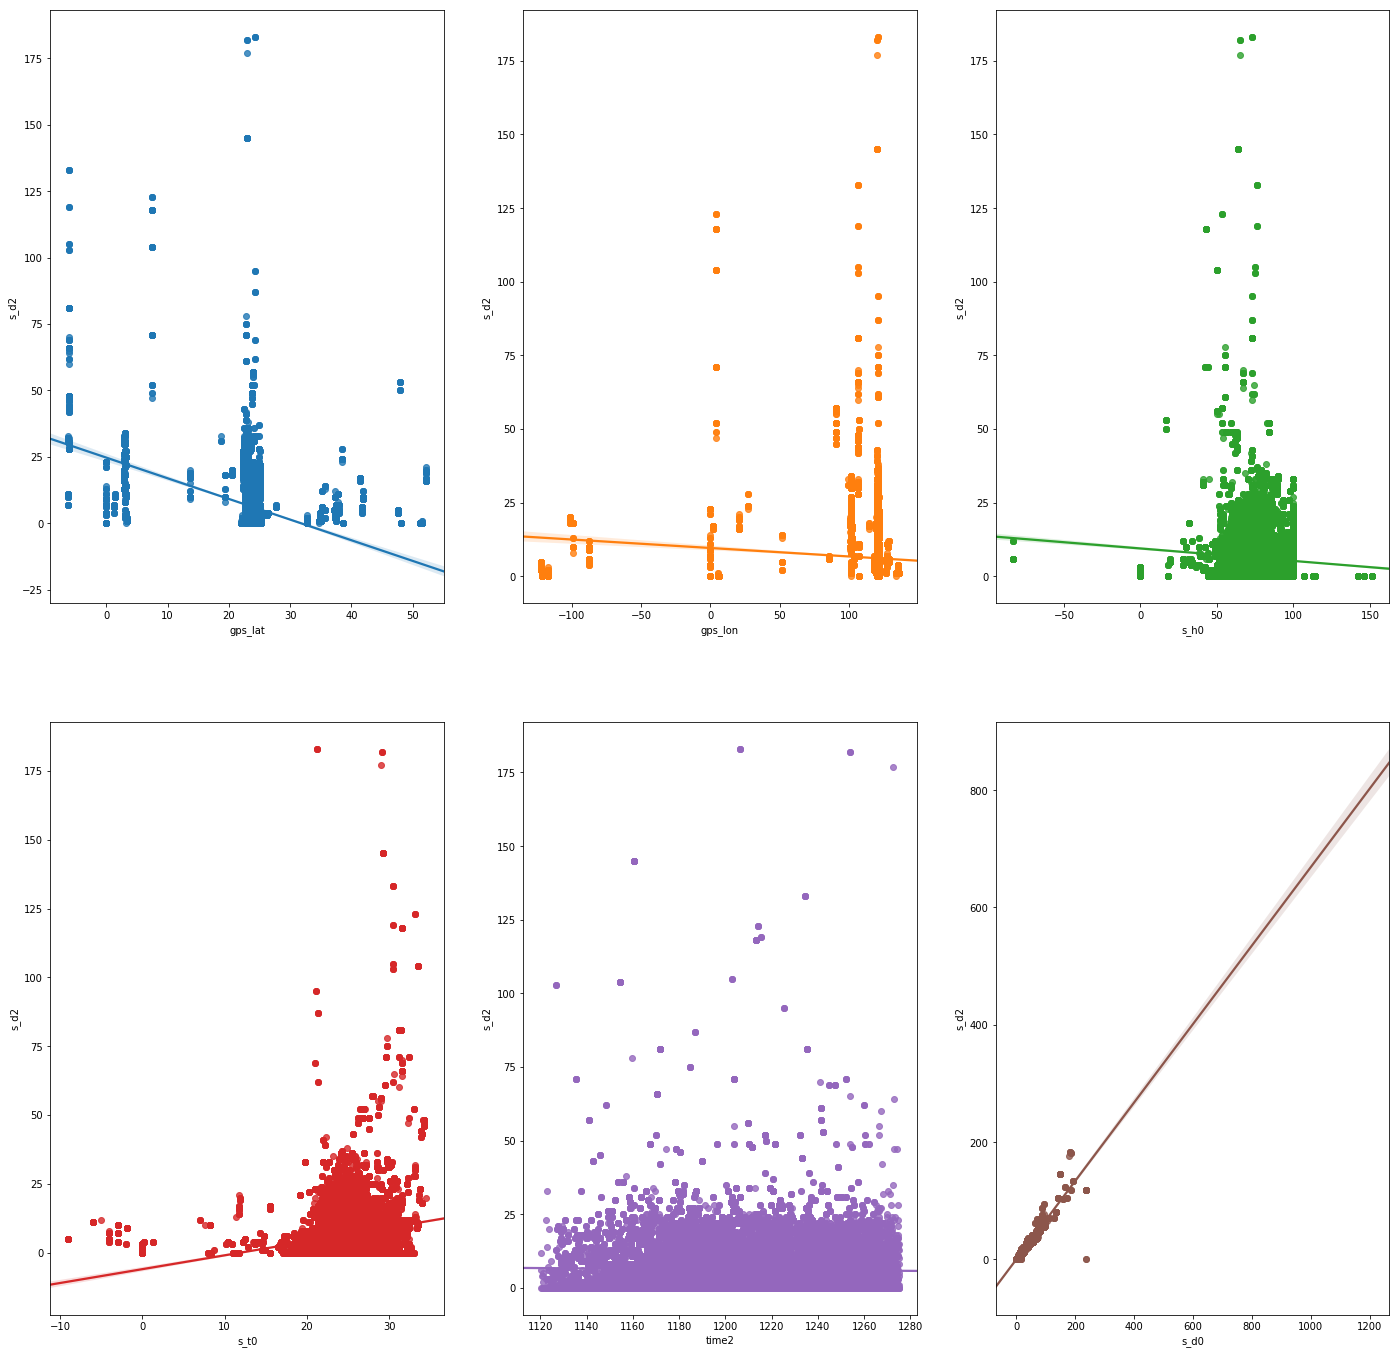

In [10]:
# Create a figure instance, and the two subplots
inputNum = len(df.columns)-1

#sns.set(font_scale=2)
fig, axes = plt.subplots(2, 3, figsize=(24, 24))


for i in range(0, 2):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

#plt.show()

## standardization

In [11]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,gps_lat,gps_lon,s_h0,s_t0,time2,s_d0,s_d1,s_d2
0,0.248324,0.144838,-0.382583,0.065146,0.714940,-0.643213,-0.640279,-0.650045
1,0.217247,0.145004,-0.072155,-0.757096,1.222919,-0.643213,-0.640279,-0.650045
2,0.215813,0.146454,0.362443,-1.218289,0.790984,-0.643213,-0.640279,-0.650045
3,-5.671823,-4.868464,-1.003438,1.219446,1.147381,-0.643213,-0.640279,-0.650045
4,0.036523,0.119682,1.479983,-0.032364,0.917219,0.287484,0.185754,0.602796


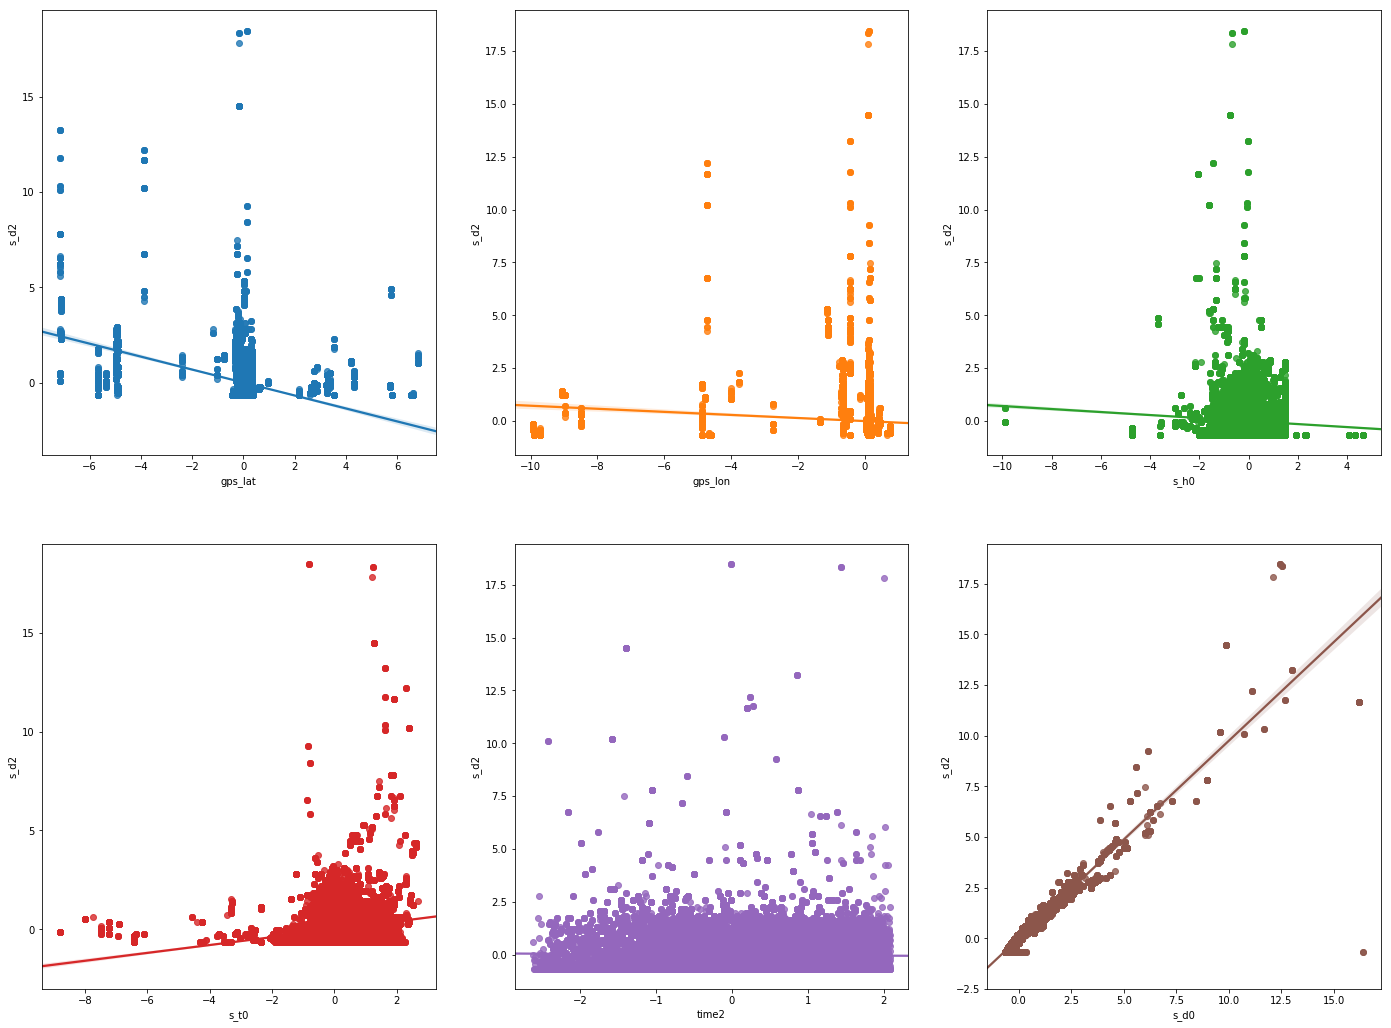

In [12]:
# Create a figure instance, and the two subplots
inputNum = len(df.columns)-1

#sns.set(font_scale=2)
fig, axes = plt.subplots(2, 3, figsize=(24, 18))


for i in range(0, 2):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

#plt.show()

## Data Partition
* For each input attribute
    * 80% data for training
    * 20% data for testing

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7']
col = ['MSE', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

inputNum = len(df.columns)-1

X, y = df.iloc[:, 0:inputNum], df.iloc[:, inputNum:inputNum+1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Simple Linear Regression
   * iteratively train linear model with each attribute

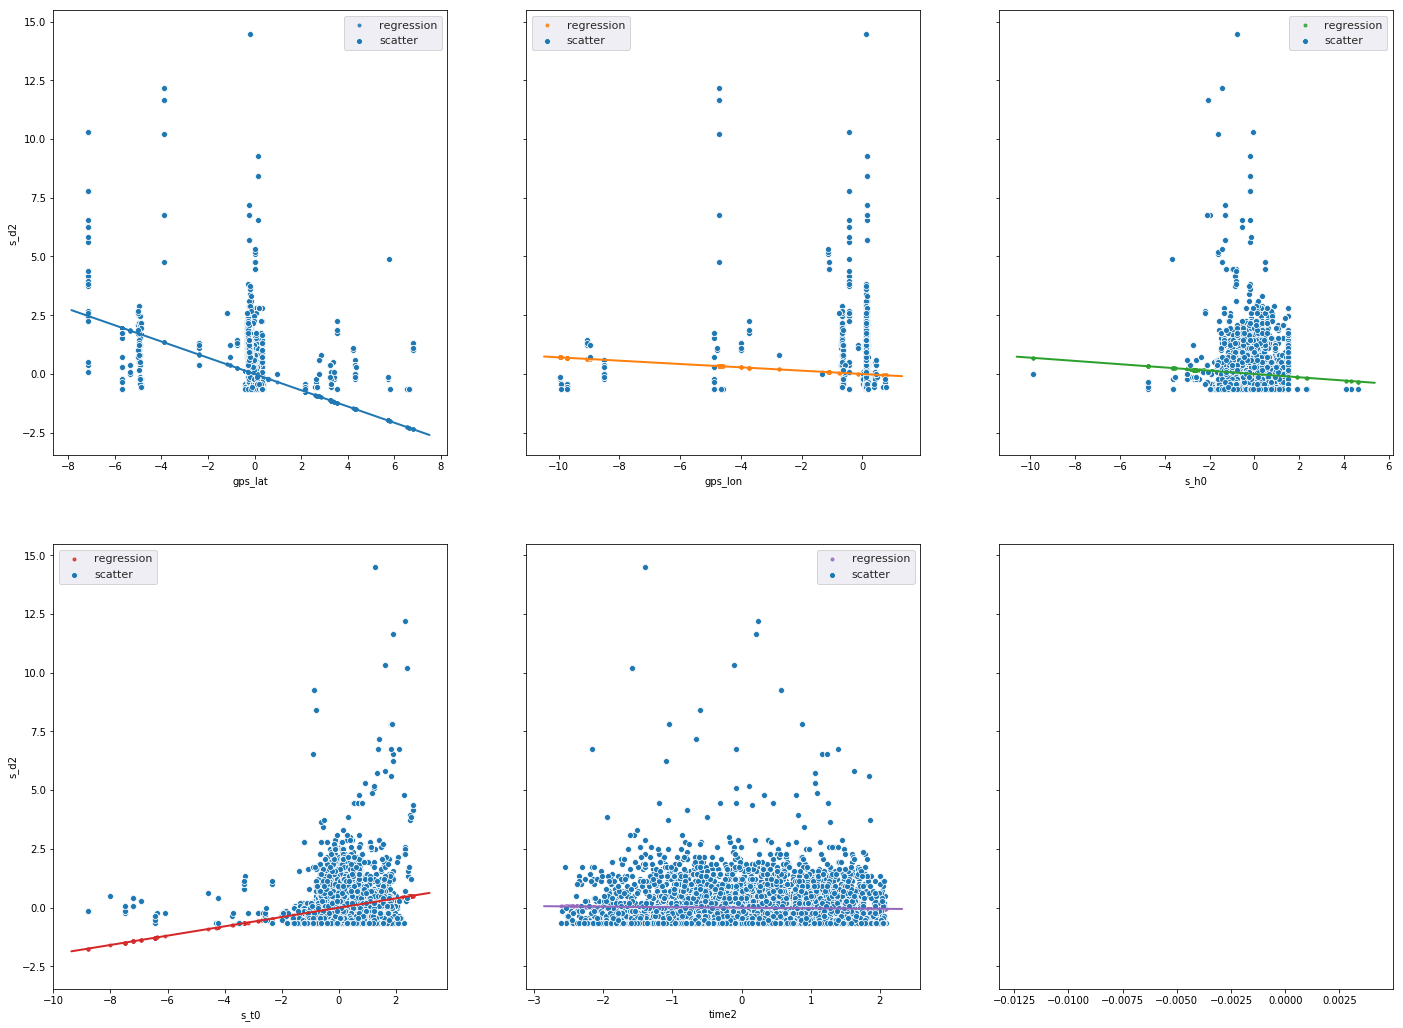

In [14]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(2, 3, figsize=(24, 18), sharey=True)
#axes[2][2].set_visible(False)

# Put train/test data to DataFrame to draw plot
Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test], axis=1)
    
for i in range(0, inputNum-2):

    """ simple linear regression by sklearn function"""

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train.iloc[:, i:i+1], y_train)
    
    # Prediction
    y_pred_lm = reg1.predict(X_test.iloc[:, i:i+1])
    Test['y_pred_lm'] = y_pred_lm

    # Plot outputs    
    plotRow = i//3
    plotCol = i%3
    
    sns.set(font_scale=1)
    sns.regplot(x=Test.columns[i], y='y_pred_lm', 
                data=Test, label='regression', 
                marker='.', line_kws={"linewidth": 2 },
                ax=axes[plotRow][plotCol])
    
    sns.set(font_scale=1)
    sns.scatterplot(x=Test.columns[i], y=Test.columns[-2], 
                    data=Test, label='scatter', 
                    ax=axes[plotRow][plotCol])

    
    # Record metrics
    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = r2_score(y_test, y_pred_lm)
    regResult.iloc[i, 2] = reg1.intercept_[0]
    regResult.iloc[i, 3] = reg1.coef_[0]

In [15]:
regResult

,MSE,R2,bias,weight
lm1,0.834284,0.118346,-0.00228637,[-0.34572268326160627]
lm2,0.93981,0.00682842,-0.0026241,[-0.07093834726378577]
lm3,0.940566,0.00602963,-0.00281295,[-0.06953198712200309]
lm4,0.905474,0.0431141,-0.00263913,[0.19817617114983255]
lm5,0.946487,-0.000227659,-0.00281993,[-0.02262139510803926]
lm6,NaN,NaN,NaN,NaN
lm7,NaN,NaN,NaN,NaN


In [16]:
Test.columns

Index(['gps_lat', 'gps_lon', 's_h0', 's_t0', 'time2', 's_d0', 's_d1', 's_d2',
       'y_pred_lm'],
      dtype='object')

In [17]:
degree_num = 5
row = []

for degree in range(1, degree_num+1):
    row.append('ridge'+str(degree))
    
#row = ['ridge1', 'ridge2', 'ridge3', 'ridge4', 'ridge5']
col = ['1-MSE', 'R2']
regResult = pd.DataFrame(index=row, columns=col)

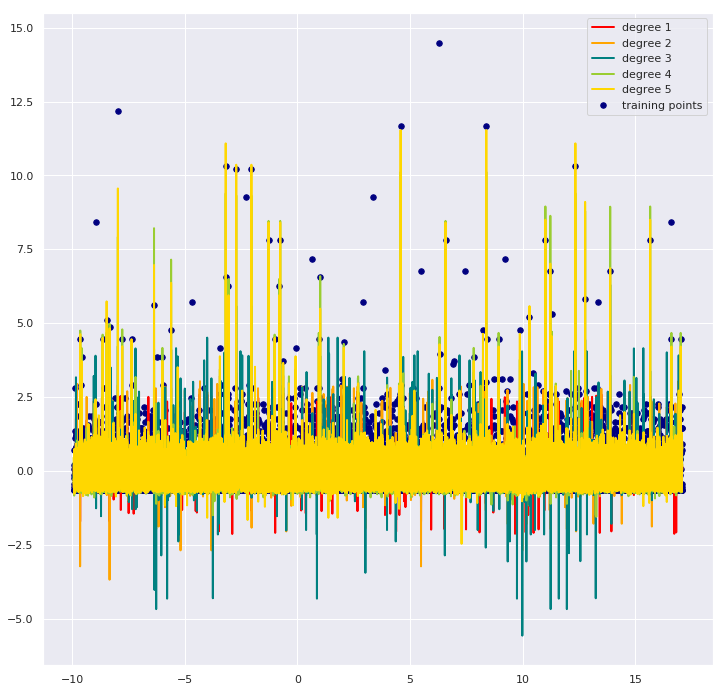

,1-MSE,R2
ridge1,0.191279,0.14536
ridge2,0.269414,0.227932
ridge3,0.361019,0.324738
ridge4,0.608208,0.585962
ridge5,0.64008,0.619644


In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(12,12))
T = np.linspace(X_test.min().min(), X_test.max().max(), 7625)[:, np.newaxis]
plt.scatter(T, y_test, color='navy', s=30, marker='o', label="training points")

colors = ['red', 'orange', 'teal', 'yellowgreen', 'gold']
lw = 2
for count, degree in enumerate(range(1,degree_num+1)):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train.iloc[:, :-2], y_train)
    y_polyRidge = model.predict(X_test.iloc[:, :-2])
    regResult.iloc[count] = 1-mean_squared_error(y_test, y_polyRidge), r2_score(y_test, y_polyRidge)
                        
    plt.plot(T, y_polyRidge, color=colors[count], linewidth=lw, label="degree %d" % (degree))
plt.legend()
plt.show()
regResult

In [19]:
regResult

,1-MSE,R2
ridge1,0.191279,0.14536
ridge2,0.269414,0.227932
ridge3,0.361019,0.324738
ridge4,0.608208,0.585962
ridge5,0.64008,0.619644


In [20]:
np.sort(X_test.iloc[:, :-2].values.reshape(1,-1))

array([[-9.93754711, -9.93754711, -9.93754711, ...,  6.80578678,
         6.80578678,  6.80578678]])

## Compare 10 regression model
* Stochastic Gradient Descent
* k-NN
* SVM with 
    * linear kernel
    * RBF kernel
* Gaussian Procress with
    * RBF kernel
    * Dot Product kernel
* Decision Tree
* Random Forest
* AdaBoost
* Neural Net(Perceptron)

In [26]:

import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd


# Preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


# import regressors
# for regressors, score function is R2-score in sklearn.metrics
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# import MSE
from sklearn.metrics import mean_squared_error


# Result
col = ['model', 'MSE', 'R2']
regResult = pd.DataFrame(columns=col)


# Regressor List
regressornames = ["SGD", "Nearest Neighbors", "Linear SVR", "RBF SVR", 
         "RBF Gaussian Process", "DotKernel Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost", "Neural Net"]

regressors = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    KNeighborsRegressor(3), 
    SVR(kernel='linear', C=1e3),
    SVR(kernel='rbf', C=1e3, gamma=0.1),
    GaussianProcessRegressor(kernel=1.0 * RBF(1.0)),
    GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=2), 
    AdaBoostRegressor(),
    MLPRegressor(hidden_layer_sizes=(5,),
                   learning_rate='adaptive',
                   max_iter=1000,
                   learning_rate_init=0.01,
                   alpha=0.01)
    ]

# Dataset List
iris = datasets.load_iris()
dataName = ["iris"]
X, y = iris.data[:, 0:3], iris.data[:, 3]
myiris = (X, y)

datasets = [myiris]

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    
    # Standardize
    #X = StandardScaler().fit_transform(X)
    
    # Data Split
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    # iterate over regressors
    for name, regressor in zip(regressornames, regressors):
        regressor.fit(X_train, y_train)
        score = regressor.score(X_test, y_test)
        y_pred = regressor.predict(X_test)
        print(name, "score: ", score)
        regResult = regResult.append({'model': name, 
                          'MSE': mean_squared_error(y_test, y_pred), 
                          'R2': score}, 
                          ignore_index=True)
        
display(regResult)
print(regResult)

SGD score:  0.9371947217964166
Nearest Neighbors score:  0.9521393775791989
Linear SVR score:  0.939459689737478
RBF SVR score:  0.9265589082421178
RBF Gaussian Process score:  -1.7977520245741414


/home/ailurus/.local/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'grad': array([33554441.49978235,       -0.        ]), 'warnflag': 2, 'nit': 2}
  ConvergenceWarning)


DotKernel Gaussian Process score:  0.9395192317829218
Decision Tree score:  0.9216373234315558
Random Forest score:  0.9390565457519352
AdaBoost score:  0.9348201112402518
Neural Net score:  0.9314538511470837


,model,MSE,R2
0,SGD,0.039983,0.937195
1,Nearest Neighbors,0.030469,0.952139
2,Linear SVR,0.038541,0.939460
3,RBF SVR,0.046754,0.926559
4,RBF Gaussian Process,1.781111,-1.797752
5,DotKernel Gaussian Process,0.038503,0.939519
6,Decision Tree,0.049887,0.921637
7,Random Forest,0.038798,0.939057
8,AdaBoost,0.041495,0.934820
9,Neural Net,0.043638,0.931454


In [22]:
print(regResult)

                        model       MSE        R2
0                         SGD  0.037079  0.941757
1           Nearest Neighbors  0.030469  0.952139
2                  Linear SVR  0.038541  0.939460
3                     RBF SVR  0.046754  0.926559
4        RBF Gaussian Process  1.781111 -1.797752
5  DotKernel Gaussian Process  0.038503  0.939519
6               Decision Tree  0.049665  0.921986
7               Random Forest  0.031612  0.950344
8                    AdaBoost  0.037759  0.940688
9                  Neural Net  0.043190  0.932158
